In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.integrate import quad
from tqdm import tqdm

In [ ]:
with open('/content/drive/MyDrive/Math16.txt', 'r') as f:
    data = f.readlines()

In [ ]:
data = np.array(list(map(lambda x: float(x.replace('\n', '')), data)))

In [ ]:
data

array([335., 277., 335., ..., 258., 259., 368.])

# Задача 1

In [ ]:
def K_rect(x):
    if x >= -1 and x <= 1:
        return 1/2
    return 0

In [ ]:
def p(x, X, K, h):
    return np.mean([K((x - X[i]) / h) / h for i in range(len(X))])

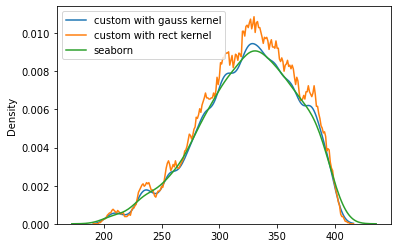

In [ ]:
x = np.arange(np.min(data) - 10, np.max(data) + 10, 1)
y = list(map(lambda x_: p(x_, data, st.norm.pdf, 5), x))
plt.plot(x, y)
y = list(map(lambda x_: p(x_, data, K_rect, 5), x))
plt.plot(x, y)
sns.kdeplot(data)
plt.legend(['custom with gauss kernel', 'custom with rect kernel', 'seaborn'])

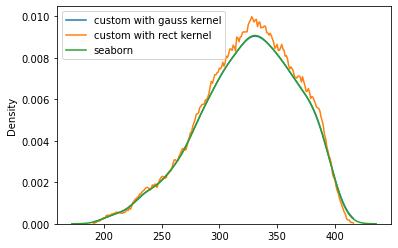

In [ ]:
x = np.arange(np.min(data) - 10, np.max(data) + 10, 1)
y = list(map(lambda x_: p(x_, data, st.norm.pdf, 10), x))
plt.plot(x, y)
y = list(map(lambda x_: p(x_, data, K_rect, 10), x))
plt.plot(x, y)
sns.kdeplot(data)
plt.legend(['custom with gauss kernel', 'custom with rect kernel', 'seaborn'])

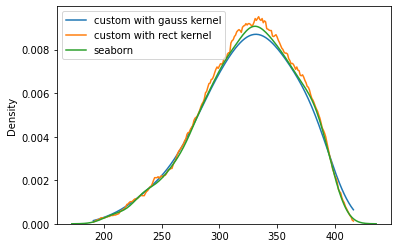

In [ ]:
x = np.arange(np.min(data) - 10, np.max(data) + 10, 1)
y = list(map(lambda x_: p(x_, data, st.norm.pdf, 15), x))
plt.plot(x, y)
y = list(map(lambda x_: p(x_, data, K_rect, 15), x))
plt.plot(x, y)
sns.kdeplot(data)
plt.legend(['custom with gauss kernel', 'custom with rect kernel', 'seaborn'])

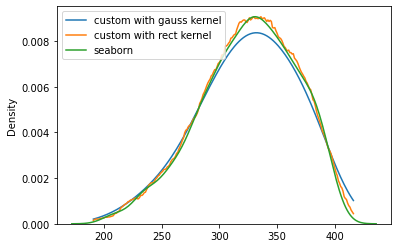

In [ ]:
x = np.arange(np.min(data) - 10, np.max(data) + 10, 1)
y = list(map(lambda x_: p(x_, data, st.norm.pdf, 20), x))
plt.plot(x, y)
y = list(map(lambda x_: p(x_, data, K_rect, 20), x))
plt.plot(x, y)
sns.kdeplot(data)
plt.legend(['custom with gauss kernel', 'custom with rect kernel', 'seaborn'])

# Cross validation

In [ ]:
def K_star_gauss(x):
    return st.norm.pdf(x, scale=0.5**0.5) - 2 * st.norm.pdf(x)

def J_gauss(h, X):
    res = 0
    x = np.sum(np.meshgrid(X, -X), axis=0) / h
    res = np.sum(st.norm.pdf(x, scale=0.5**0.5) - 2 * st.norm.pdf(x))
    return res / h / len(X)**2 + 2 / h / len(X) * st.norm.pdf(0)


def K_star_rect(x):
    res = 0
    if x >= 0 and x <= 2:
        res += 1/4 * (2-x)
    elif x >= -2 and x <= 0:
        res += 1/4 * (x+2)

    if x >= -1 and x <= 1:
        res -= 1

    return res

def J_rect(h, X):
    res = 0
    f = np.vectorize(K_star_rect)
    x = np.sum(np.meshgrid(X, -X), axis=0) / h
    res = np.sum(f(x))
    return res / h / len(X)**2 + 2 / h / len(X) * K_rect(0)

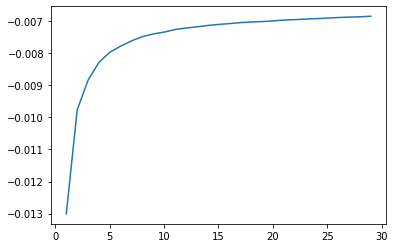

In [ ]:
H = np.arange(1, 30, 1)
y = list(map(lambda x: J_rect(x, data), H))
plt.plot(H, y)

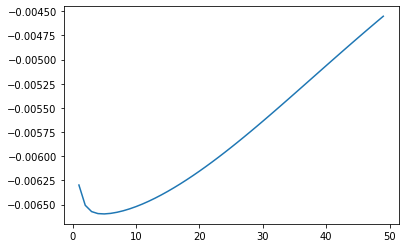

In [ ]:
H = np.arange(1, 50, 1)
y = list(map(lambda x: J_gauss(x, data), H))
plt.plot(H, y)

# Задача 2

In [ ]:
interquantile = lambda x: np.quantile(x, 0.75) - np.quantile(x, 0.25)

In [ ]:
print(f'Естественная оценка: {interquantile(data)}')

Естественная оценка: 59.0


In [ ]:
m = 1000
alpha = 0.05

x = np.random.choice(data, size=(m, len(data)))
y1 = np.quantile(x, 0.75, axis=1) - np.quantile(x, 0.25, axis=1)

print(f'Percentile interval {np.quantile(y1, alpha), np.quantile(y1, 1-alpha)}')


x = np.random.choice(data, size=(m, len(data)))
y1_ = np.quantile(x, 0.75, axis=1) - np.quantile(x, 0.25, axis=1)
y2_ = 2 * interquantile(data) - y1_

print(f'Pivotal interval {np.quantile(y2_, alpha), np.quantile(y2_, 1-alpha)}')

Percentile interval (56.0, 62.0)
Pivotal interval (56.0, 62.0)


In [ ]:
def p(x, X, h):
    return np.mean(st.norm.pdf((x - np.array(X)) / h) / h)

In [ ]:
dens = np.vectorize(lambda x: p(x, data, 10))
edf = np.vectorize(lambda x: np.mean(data <= x))

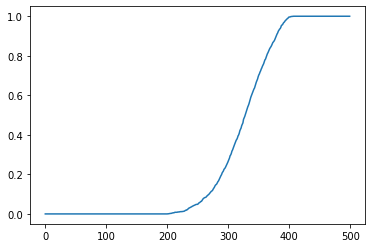

In [ ]:
plt.plot(np.arange(0, 500, 1), edf(np.arange(0, 500, 1)))

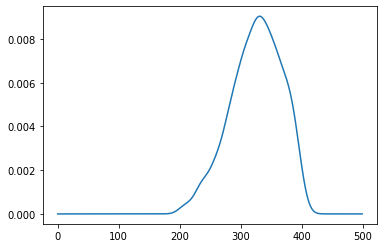

In [ ]:
plt.plot(np.arange(0, 500, 1), dens(np.arange(0, 500, 1)))

In [ ]:
sigma = ((0.25**2 * 0.75 + 0.75**2 * 0.25) / (dens(np.quantile(data, 0.75)))**2 + \
  (0.25**2 * 0.75+ 0.75**2 * 0.25) / (dens(np.quantile(data, 0.25)))**2 - \
  (0.5 * 0.25) / (dens(np.quantile(data, 0.75)) * dens(np.quantile(data, 0.25))))**0.5

In [ ]:
print(f'Delta-method interval {interquantile(data) - st.norm.isf(alpha / 2) * sigma / len(data)**0.5, interquantile(data) + st.norm.isf(alpha / 2) * sigma / len(data)**0.5}')

Delta-method interval (55.55897517768416, 62.44102482231584)


# Задание 3

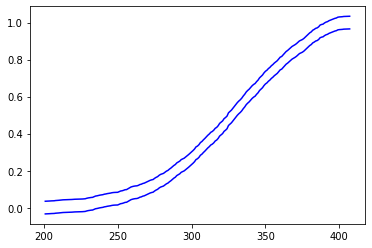

In [ ]:
n = len(data)
x = np.array(sorted(data))
y = edf(x)

#Строим интервалы ДВК
alpha=0.05
epsDVK = np.sqrt(-np.log(alpha/2)/(2*n))

funNlowD=y-epsDVK
funNupD=y+epsDVK


plt.plot(x,funNlowD, color='B')

plt.plot(x,funNupD, color='B')
plt.show()


In [ ]:
a = np.array(sorted([0.001, 0.003, 0.005,0.01, 0.01, 0.011,0.02, 0.15, 0.3]))

c = np.sum([1 / i for i in range(1, len(a) + 1)])

l = np.array([i * alpha / (len(a) * c) for i in range(1, len(a) + 1)])

res = a < l

for i in range(len(a) - 1, -1, -1):
    if res[i]:
        border = a[i]
        break

np.sum(a < border)

5

In [ ]:
a = np.array([0.00017, 0.00448, 0.00671, 0.00907, 0.01220,
0.33626, 0.39341, 0.53882, 0.58125, 0.98617])

c = np.sum([1 / i for i in range(1, len(a) + 1)])

l = np.array([i * alpha / (len(a) * c) for i in range(1, len(a) + 1)])

a < l

array([ True, False, False, False, False, False, False, False, False,
       False])